<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayesian-estimation-equivalent-of-linear-mixed-model" data-toc-modified-id="Bayesian-estimation-equivalent-of-linear-mixed-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian estimation equivalent of linear mixed model</a></span><ul class="toc-item"><li><span><a href="#The-classic-linear-mixed-model" data-toc-modified-id="The-classic-linear-mixed-model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The classic linear mixed model</a></span></li></ul></li><li><span><a href="#Bayesian-inference" data-toc-modified-id="Bayesian-inference-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bayesian inference</a></span></li><li><span><a href="#Steps-of-Bayesian-data-analysis" data-toc-modified-id="Steps-of-Bayesian-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Steps of Bayesian data analysis</a></span></li><li><span><a href="#Step-1---Identify-the-relevant-data-for-question-under-investigation" data-toc-modified-id="Step-1---Identify-the-relevant-data-for-question-under-investigation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 1 - Identify the relevant data for question under investigation</a></span><ul class="toc-item"><li><span><a href="#Data-cleaning-and-exploratory-data-analysis" data-toc-modified-id="Data-cleaning-and-exploratory-data-analysis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data cleaning and exploratory data analysis</a></span></li></ul></li><li><span><a href="#Step-2---Define-the-descriptive-statistical-model-\begin{align*}
y_{ij}-&amp;\sim-Normal(\beta_0-+-u_{1j}-+-x(\beta_1-+-u_{2j}),-\sigma)
\\-\beta_0-&amp;\sim-Normal(250,-50)
\\-\beta_1-&amp;\sim-Normal(0,-50)
\\-u_1-&amp;\sim-Normal(0,-\tau_{u1})
\\-u_2-&amp;\sim-Normal(0,-\tau_{u2})
\\-\tau_{u1}-&amp;\sim-halfNormal(0,-50)
\\-\tau_{u2}-&amp;\sim-halfNormal(0,-20)
\\-\sigma-&amp;\sim-halfNormal(0,-50)
\end{align*}" data-toc-modified-id="Step-2---Define-the-descriptive-statistical-model-\begin{align*}
y_{ij}-&amp;\sim-Normal(\beta_0-+-u_{1j}-+-x(\beta_1-+-u_{2j}),-\sigma)
\\-\beta_0-&amp;\sim-Normal(250,-50)
\\-\beta_1-&amp;\sim-Normal(0,-50)
\\-u_1-&amp;\sim-Normal(0,-\tau_{u1})
\\-u_2-&amp;\sim-Normal(0,-\tau_{u2})
\\-\tau_{u1}-&amp;\sim-halfNormal(0,-50)
\\-\tau_{u2}-&amp;\sim-halfNormal(0,-20)
\\-\sigma-&amp;\sim-halfNormal(0,-50)
\end{align*}-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 2 - Define the descriptive statistical model <div class="MathJax_Display" style="text-align: center;"></div><script type="math/tex; mode=display" id="MathJax-Element-51">\begin{align*}
y_{ij} &\sim Normal(\beta_0 + u_{1j} + x(\beta_1 + u_{2j}), \sigma)
\\ \beta_0 &\sim Normal(250, 50)
\\ \beta_1 &\sim Normal(0, 50)
\\ u_1 &\sim Normal(0, \tau_{u1})
\\ u_2 &\sim Normal(0, \tau_{u2})
\\ \tau_{u1} &\sim halfNormal(0, 50)
\\ \tau_{u2} &\sim halfNormal(0, 20)
\\ \sigma &\sim halfNormal(0, 50)
\end{align*}</script></a></span></li><li><span><a href="#Step-3---Specifying-priors-for-the-model" data-toc-modified-id="Step-3---Specifying-priors-for-the-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 3 - Specifying priors for the model</a></span></li><li><span><a href="#Stan-model-of-varying-intercept-and-slope-linear-mixed-model" data-toc-modified-id="Stan-model-of-varying-intercept-and-slope-linear-mixed-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Stan model of varying intercept and slope linear mixed model</a></span></li><li><span><a href="#Reporting-the-results-of-Bayesian-linear-mixed-model" data-toc-modified-id="Reporting-the-results-of-Bayesian-linear-mixed-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Reporting the results of Bayesian linear mixed model</a></span></li><li><span><a href="#Reporting-the-results-of-the-Bayesian-one-sample-t-test-equivalent" data-toc-modified-id="Reporting-the-results-of-the-Bayesian-one-sample-t-test-equivalent-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Reporting the results of the Bayesian one sample t-test equivalent</a></span><ul class="toc-item"><li><span><a href="#Write-up" data-toc-modified-id="Write-up-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span><font size="3">Write up</font></a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [12]:
# Import the neccesary python libraries for Bayesian analysis
# and data visualisation.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import os
import pystan as ps
import arviz as az
import statistics as Stats
import scipy.stats as stats
from patsy import dmatrix

In [18]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Bayesian estimation equivalent of linear mixed model

## The classic linear mixed model

# Bayesian inference
<font size = "3"> Following the quick description of classic linear mixed model above its important to keep in mind that Bayesian analysis inference are all derived from the application of Bayes rule $P(\theta \mid y) = \large \frac{P(y \mid \theta) \, P(\theta)}{P(y)}$ and as such while the following description of the Bayesian model is an equivalent to a classic linear mixed model, it is fundamentally different, because its uses fully probabilistic modelling and therefore  the infernces are not based on sampling distributions</font>
    
<font size = "1"> For a fuller description see the practicing Bayesian statistics markdown file within the Github repository.</font>

# Steps of Bayesian data analysis

<font size = "3"> Kruscke (2015) offers a step by step formulation for how to conduct a Bayesian analysis:

1. Identify the relevant data for question under investigation.

2. Define the descriptive (mathematical) model for the data.

3. Specify the Priors for the model. In the case of scientific research publication is the goal, as such the priors must be accepted by a skeptical audience. Much of this can be achieved using prior predcitve checks to acsetain os the priors are reasonable.

4. Using Bayes rule estimate the posterior for the parameters of the model using the likelihood and priors. Then interprete and the posterior

5. Conduct model checks. i.e. Posterior predcitive checks.</font> 

<font size = "1">This notebook will follow this approach generally.</font> 

#  Step 1 - Identify the relevant data for question under investigation

Within this notebook the example linear mixed model anlysis will be conducted on a peadagogically standard and coomoly refered to "sleep study" data set from the LME4 package (Bates, Mächler, Bolker, & Walker 2014) taken from Belenky et al (2003).

The "sleep study" dataset consists of repeated observations from 18 participants of their average reaction time (ms) across 10 days of testing. Baseline scores on day 0 consisted of the reactions times scores for each participant before sleep deprivation began. for the following 9 days sleep was resticted to 3 hours.

## Data cleaning and exploratory data analysis

In [3]:
url = "https://raw.githubusercontent.com/ebrlab/Statistical-methods-for-research-workers-bayes-for-psychologists-and-neuroscientists/master/Data/Sleepstudy_data"

#Import data .csv file into pandas dataframe.
df = pd.read_csv(url)

In [4]:
# Convert to long to change the particapnt ids to 1:18
df_wide = df.pivot_table(index = 'Subject', columns = 'Days', values = 'Reaction').reset_index()
df_wide['Subject'] = list(range(1, len(df_wide)+1))

In [5]:
df_long = pd.melt(df_wide, id_vars=['Subject'], value_vars = range(0,10),
        var_name='Day', value_name='Reaction')
df_long['Day'] = df_long['Day'].astype(int)


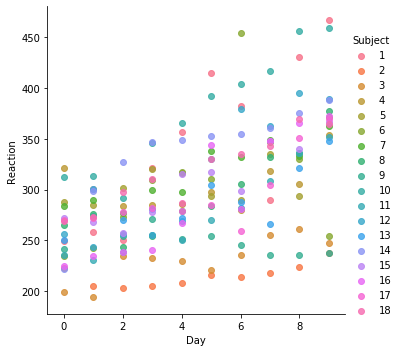

In [17]:
sns.lmplot('Day', 'Reaction', data=df_long, hue='Subject', fit_reg=False)

In case such as the one with this dataset with few subject but multiple observation veiwing the data toghether can provide useful insight. What the plot seems to show is that generally reaction times descreased as the number of sleep deprived days increased but that there was variability between the subjects in terms hoe much their reaction times decreased

# Step 2 - Define the descriptive statistical model \begin{align*}
y_{ij} &\sim Normal(\beta_0 + u_{1j} + x(\beta_1 + u_{2j}), \sigma)
\\ \beta_0 &\sim Normal(250, 50)
\\ \beta_1 &\sim Normal(0, 50)
\\ u_1 &\sim Normal(0, \tau_{u1})
\\ u_2 &\sim Normal(0, \tau_{u2})
\\ \tau_{u1} &\sim halfNormal(0, 50)
\\ \tau_{u2} &\sim halfNormal(0, 20)
\\ \sigma &\sim halfNormal(0, 50)
\end{align*} 

# Step 3 - Specifying priors for the model

# Stan model of varying intercept and slope linear mixed model

In [57]:
Linear_mixed_model = """

data {
  int<lower=0> N; // number of data observed
  int<lower=0> J; // number of subjects
  int<lower= 0> K; // number of fixed effects
  vector[N] y; // obsevered data
  vector[N] x; // predictor
  int<lower = 0, upper=J> subj_id[N];
  int<lower= 0, upper = 1> onlyprior;
}

parameters {
// Fixed effects parameter 
vector[K] beta;
// random intercept parameters
vector[J] u_1;
// random slope parameter
vector[J] u_2;

// residual error
real<lower = 0> sigma;

// Population distribution for the subject variability 
// for intercept and slope terms
vector<lower=0>[2] sigma_u;


}

transformed parameters{
vector[N] mu;

for (i in 1:N){
mu[i] = beta[1] + u_1[subj_id[i]] + (beta[2] + u_2[subj_id[i]]) * x[i];
    }
}

model {
// Priors
beta[1] ~ normal(250,50);
beta[2] ~ normal(0,50);
sigma ~  normal(0, 50);
sigma_u[1] ~ normal(0, 50);
sigma_u[2] ~ normal(0, 20);
u_1 ~ normal(0, sigma_u[1]);
u_2 ~ normal(0, sigma_u[2]);

if (!onlyprior)
//likelihood
y ~ normal(mu, sigma);

}

generated quantities{
vector[N] yrep;

for (i in 1:N){
yrep[i] = normal_rng(mu[i], sigma);
    }
}

"""

In [58]:
sm = ps.StanModel(model_code = Linear_mixed_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_03e0a14c53633e6cf81f3726ee6dc79a NOW.


In [64]:
X = df_long['Day']
data = {'N': len(df),
        'y': df_long.Reaction.values,
        'K': 2,
        'x': X,
        'J': df_long.Subject.nunique(),
        'subj_id': df_long.Subject.values,
        # set to one for prior predictive checks
        'onlyprior': 0}

In [65]:
fit = sm.sampling(data = data, iter = 2000, warmup=1000, chains = 4, seed = 1);

In [61]:
print(fit)

Inference for Stan model: anon_model_03e0a14c53633e6cf81f3726ee6dc79a.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta[1]     249.2    0.86  50.88 148.58 215.57  249.1 282.73 348.95   3530    1.0
beta[2]      0.21    0.75  50.09 -97.87  -33.2  -0.57  34.18  97.51   4512    1.0
u_1[1]      -0.25    0.69  48.87 -106.3 -20.45  -0.15  20.71 105.39   4992    1.0
u_1[2]      -0.69    0.74  49.36 -104.5 -21.62  -0.23  20.01  104.1   4397    1.0
u_1[3]      -0.16    0.76  50.11 -106.8 -20.19  -0.18  21.72 106.58   4326    1.0
u_1[4]       1.28    0.64  48.11 -106.3 -18.01   0.68  21.81 103.77   5697    1.0
u_1[5]        0.1    0.65  48.99 -109.5 -20.33  -0.19  19.14 110.28   5595    1.0
u_1[6]      -1.06    0.66  48.96 -104.8  -21.6  -0.24  19.81 100.25   5476    1.0
u_1[7]      -0.32    0.66  50.81 -111.2 -22.02  -0.29  21.18 112.02   600

In [ ]:
Posterior predicitve checks

In [72]:
#Convert pystan fit object to IO for Arviz functions.
data = az.from_pystan(
                posterior=fit,
                posterior_predictive='yrep',
                observed_data=["y"])

In [78]:
# Plot posterior simulated data sets for posterior predictive check
az.plot_ppc(data, data_pairs= {"y" : "yrep"}, num_pp_samples= 100);

TypeError: plot_ppc() got an unexpected keyword argument 'observe'

# Reporting the results of Bayesian linear mixed model

# Reporting the results of the Bayesian one sample t-test equivalent

<font size = "3">As Kruscke correctly points out there is not standard formula or presentation method for results like the APA guide for reporting frequentist analyses using the Bayesian framework. It is likely there never will be, because as McElreath (2020) explains, Bayesian data analysis is more like a engineering approach to the problem and the resulting model that is fit will be analysis specific. In addition, as Gabry et al, (2019) have argued visualisations maybe even more key, so all the visualtions above would have to be included with any write up. Anyway, the write up below generally follows the advice of Kruscke (2015) chapter 25. In any application though it comes down to the problem to be described and the audience that needs to be convinced. </p><br/>

<h2>Write up</h2><br/>

# References 

Bates, D., Mächler, M., Bolker, B., & Walker, S. (2014). Fitting linear mixed-effects models using lme4. arXiv preprint arXiv:1406.5823.

Belenky, G., Wesensten, N. J., Thorne, D. R., Thomas, M. L., Sing, H. C., Redmond, D. P., ... & Balkin, T. J. (2003). Patterns of performance degradation and restoration during sleep restriction and subsequent recovery: A sleep dose‐response study. Journal of sleep research, 12(1), 1-12.

Singmann, H., & Kellen, D. (2019). An Introduction to Mixed Models for Experimental Psychology. In
D. H. Spieler & E. Schumacher (Eds.), New Methods in Cog.